<a href="https://colab.research.google.com/github/ElCaballo69/JDPR-Methods-Lecture-3/blob/main/Lecture_10_Interpolation_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise-
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [2]:
def linear_interpolation(x0,y0,x1,y1,x):
  return y0 + ((x-x0)*(y1-y0))/(x1-x0)
x0=1
y0=3
x1=4
y1=12
x=2.5
print(linear_interpolation(x0,y0,x1,y1,x))

7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise-
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [4]:
import math
x = math.pi/4
h=0.01

def f(x):
  return math.sin(x)
def foward_difference (f,x,h):
  return (f(x+h)-f(x))/h
def backward_difference (f,x,h):
  return (f(x)-f(x-h))/h
def central_difference (f,x,h):
  return (f(x+h)-f(x-h))/(2*h)
print ("foward difference:",foward_difference(f,x,h))
print ("backward_difference:", backward_difference(f,x,h))
print ("central_difference:", central_difference(f,x,h))
print ("Analystical Value:", math.cos(x))

foward difference: 0.7035594916892096
backward_difference: 0.710630500575693
central_difference: 0.7070949961324513
Analystical Value: 0.7071067811865476



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions.


### Exercise-
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi).

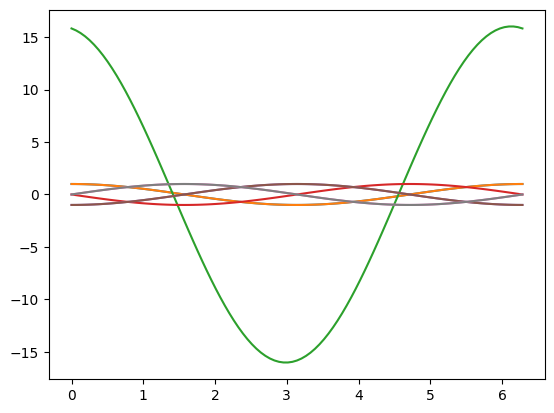

In [3]:


import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 101)
h = x[1] - x[0]

def f(x):
    return np.sin(x)
def first_derivative(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)
def second_derivative(f, x, h):
    return (f(x+2*h) - 2*f(x) + f(x-h)) / h**2
def third_derivative(f, x, h):
    return (f(x+2*h) - 2*f(x+h) + 2*f(x-h) - f(x-2*h)) / (2*h**3)
def fourth_derivative(f, x, h):
    return (f(x+2*h) - 4*f(x+h) + 6*f(x) - 4*f(x-h) + f(x-2*h)) / h**4

y1 = first_derivative(f, x, h)
y2 = second_derivative(f, x, h)
y3 = third_derivative(f, x, h)
y4 = fourth_derivative(f, x, h)
plt.plot(x, y1)
plt.plot(x, np.cos(x))
plt.plot(x, y2)
plt.plot(x, -np.sin(x))
plt.plot(x, y3)
plt.plot(x, -np.cos(x))
plt.plot(x, y4)
plt.plot(x, np.sin(x))
plt.show()



### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them.

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10
- w = 5
- E = 200e9
- I = 1e-6

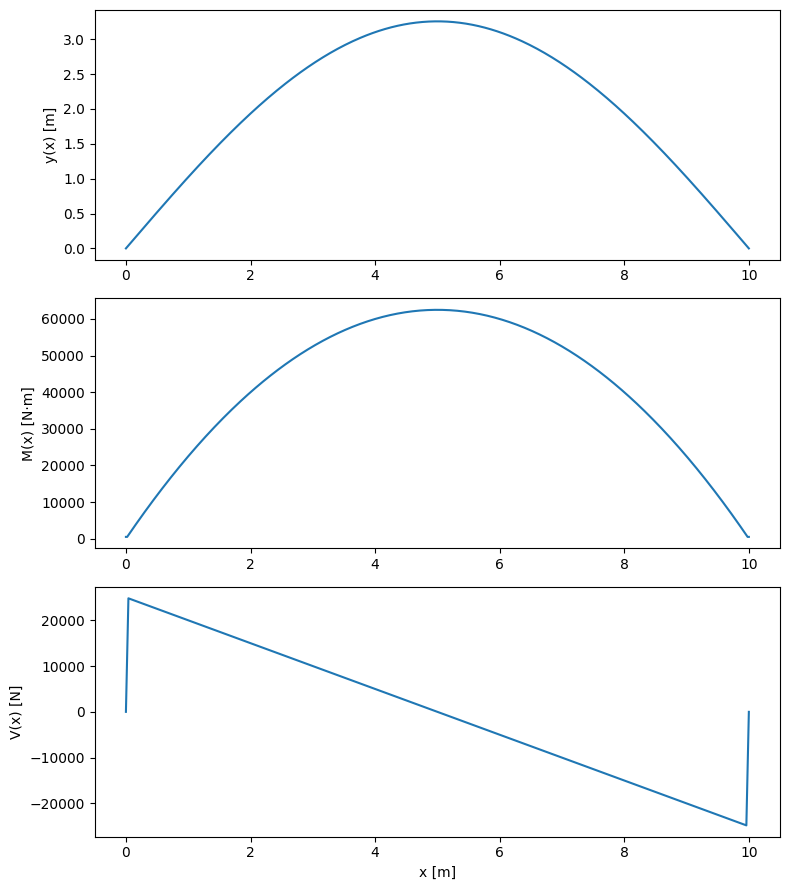

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

import numpy as np
import matplotlib.pyplot as plt

w = 5e3
L = 10.0
E = 200e9
I = 1e-6

x = np.linspace(0, L, 501)
h = x[1] - x[0]
y = (w/(24*E*I)) * x * (L**3 - 2*L*x**2 + x**3)

def d1(a, h):
    g = np.empty_like(a)
    g[1:-1] = (a[2:] - a[:-2]) / (2*h)
    g[0] = (a[1] - a[0]) / h
    g[-1] = (a[-1] - a[-2]) / h
    return g

def d2(a, h):
    g = np.empty_like(a)
    g[1:-1] = (a[2:] - 2*a[1:-1] + a[:-2]) / (h**2)
    g[0] = (a[2] - 2*a[1] + a[0]) / (h**2)
    g[-1] = (a[-1] - 2*a[-2] + a[-3]) / (h**2)
    return g

M = -E*I*d2(y, h)
V = d1(M, h)

plt.figure(figsize=(8,9))
plt.subplot(3,1,1)
plt.plot(x, y)
plt.ylabel("y(x) [m]")
plt.subplot(3,1,2)
plt.plot(x, M)
plt.ylabel("M(x) [N·m]")
plt.subplot(3,1,3)
plt.plot(x, V)
plt.ylabel("V(x) [N]")
plt.xlabel("x [m]")
plt.tight_layout()
plt.show()



## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

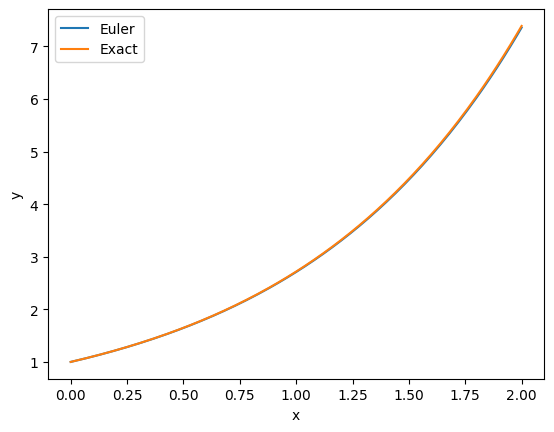

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.exp(x)
x0, y0 = 0.0, 1.0
x = np.linspace(0.0, 2.0, 201)
h = x[1] - x[0]

y = np.empty_like(x)
y[0] = y0
for n in range(len(x) - 1):
    y[n+1] = y[n] + h * f(x[n], y[n])

y_exact = np.exp(x)

plt.plot(x, y, label="Euler")
plt.plot(x, y_exact, label="Exact")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

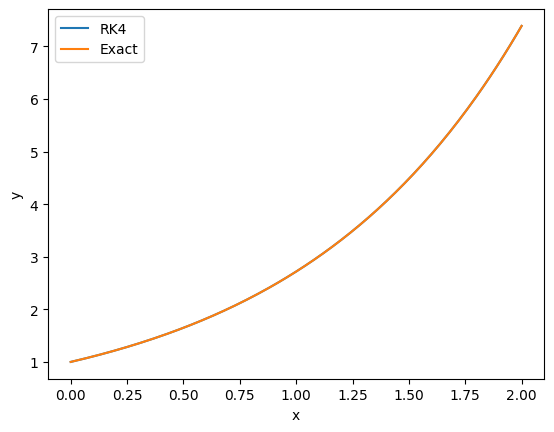

In [7]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.exp(x)
x0, y0 = 0.0, 1.0
x = np.linspace(0.0, 2.0, 201)
h = x[1] - x[0]

y = np.empty_like(x)
y[0] = y0
for n in range(len(x) - 1):
    k1 = h * f(x[n], y[n])
    k2 = h * f(x[n] + h/2, y[n] + k1/2)
    k3 = h * f(x[n] + h/2, y[n] + k2/2)
    k4 = h * f(x[n] + h, y[n] + k3)
    y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4) / 6

y_exact = np.exp(x)

plt.plot(x, y, label="RK4")
plt.plot(x, y_exact, label="Exact")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
